# Fumiaki

Here are some map ideas for your project. Let's discuss about them in the class.

In [62]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import matplotlib as mpl
# for Mac
mpl.rc('font',family='MS Gothic')

NY Crime Dataは[ここ](https://data.cityofnewyork.us/Public-Safety/NYPD-Arrest-Data-Year-to-Date-/uip8-fykc/explore/query/SELECT%0A%20%20%60arrest_key%60%2C%0A%20%20%60arrest_date%60%2C%0A%20%20%60pd_cd%60%2C%0A%20%20%60pd_desc%60%2C%0A%20%20%60ky_cd%60%2C%0A%20%20%60ofns_desc%60%2C%0A%20%20%60law_code%60%2C%0A%20%20%60law_cat_cd%60%2C%0A%20%20%60arrest_boro%60%2C%0A%20%20%60arrest_precinct%60%2C%0A%20%20%60jurisdiction_code%60%2C%0A%20%20%60age_group%60%2C%0A%20%20%60perp_sex%60%2C%0A%20%20%60perp_race%60%2C%0A%20%20%60x_coord_cd%60%2C%0A%20%20%60y_coord_cd%60%2C%0A%20%20%60latitude%60%2C%0A%20%20%60longitude%60%2C%0A%20%20%60geocoded_column%60%2C%0A%20%20%60%3A%40computed_region_f5dn_yrer%60%2C%0A%20%20%60%3A%40computed_region_yeji_bk3q%60%2C%0A%20%20%60%3A%40computed_region_92fq_4b7q%60%2C%0A%20%20%60%3A%40computed_region_sbqj_enih%60%2C%0A%20%20%60%3A%40computed_region_efsh_h5xi%60%0AWHERE%0A%20%20%60arrest_date%60%0A%20%20%20%20BETWEEN%20%222023-02-01T10%3A28%3A17%22%20%3A%3A%20floating_timestamp%0A%20%20%20%20AND%20%222023-03-01T10%3A28%3A17%22%20%3A%3A%20floating_timestamp/page/filter)からダウンロード

In [63]:
# dataを読み込む
ny = gpd.read_file('NYPD 2023-03.geojson')

In [64]:
# dataの情報を表示
ny.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16678 entries, 0 to 16677
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   perp_sex                    16678 non-null  object        
 1   latitude                    16678 non-null  object        
 2   arrest_precinct             16678 non-null  object        
 3   y_coord_cd                  16678 non-null  object        
 4   jurisdiction_code           16678 non-null  object        
 5   x_coord_cd                  16678 non-null  object        
 6   @computed_region_sbqj_enih  16678 non-null  object        
 7   age_group                   16678 non-null  object        
 8   @computed_region_efsh_h5xi  16642 non-null  object        
 9   ky_cd                       16678 non-null  object        
 10  law_code                    16678 non-null  object        
 11  arrest_boro                 16678 non-null  ob

In [65]:
# 人種別の犯罪件数を表示
perp_race_counts = ny['perp_race'].value_counts()
print(perp_race_counts)


perp_race
BLACK                             8159
WHITE HISPANIC                    4225
WHITE                             1659
BLACK HISPANIC                    1645
ASIAN / PACIFIC ISLANDER           873
UNKNOWN                             67
AMERICAN INDIAN/ALASKAN NATIVE      50
Name: count, dtype: int64


In [66]:
# 人種別の犯罪件数を表示
perp_race_counts = ny['perp_sex'].value_counts()
print(perp_race_counts)


perp_sex
M    13984
F     2694
Name: count, dtype: int64


In [67]:
perp_race_counts = ny['ofns_desc'].value_counts()
print(perp_race_counts)

ofns_desc
ASSAULT 3 & RELATED OFFENSES        2438
PETIT LARCENY                       1804
FELONY ASSAULT                      1493
VEHICLE AND TRAFFIC LAWS            1153
MISCELLANEOUS PENAL LAW             1037
DANGEROUS DRUGS                     1037
ROBBERY                              819
CRIMINAL MISCHIEF & RELATED OF       786
GRAND LARCENY                        759
DANGEROUS WEAPONS                    664
BURGLARY                             461
OFFENSES AGAINST PUBLIC ADMINI       432
OFFENSES INVOLVING FRAUD             392
OTHER OFFENSES RELATED TO THEF       391
SEX CRIMES                           363
OFF. AGNST PUB ORD SENSBLTY &        325
FORGERY                              271
POSSESSION OF STOLEN PROPERTY        265
INTOXICATED & IMPAIRED DRIVING       221
OTHER TRAFFIC INFRACTION             197
CRIMINAL TRESPASS                    158
GRAND LARCENY OF MOTOR VEHICLE       130
OTHER STATE LAWS                     125
MURDER & NON-NEGL. MANSLAUGHTE       124
FOR OT

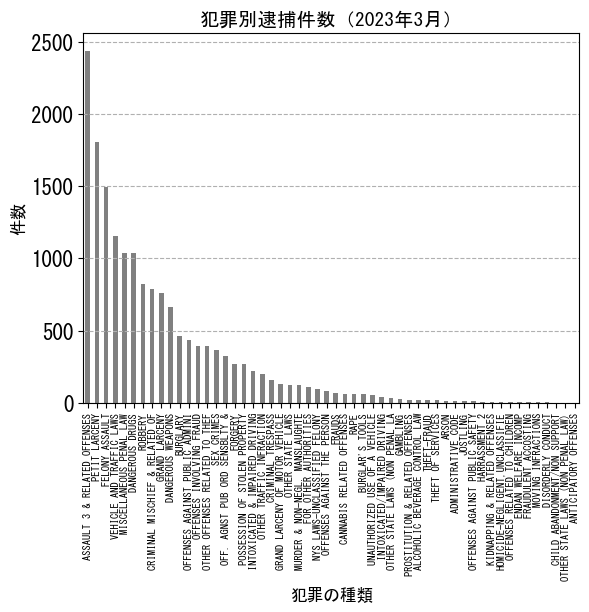

In [68]:
# Plot the bar chart with a single color
ax = ny['ofns_desc'].value_counts().plot(kind='bar', color='gray')

# Set labels and title
plt.xlabel('犯罪の種類', fontsize=12)
plt.ylabel('件数', fontsize=12)
plt.title('犯罪別逮捕件数（2023年3月）', fontsize=14)

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Adjust font size of tick labels
plt.xticks(fontsize=7.5)
plt.yticks(fontsize=15)

# Show the plot
plt.show()


In [69]:
ny.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16678 entries, 0 to 16677
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   perp_sex                    16678 non-null  object        
 1   latitude                    16678 non-null  object        
 2   arrest_precinct             16678 non-null  object        
 3   y_coord_cd                  16678 non-null  object        
 4   jurisdiction_code           16678 non-null  object        
 5   x_coord_cd                  16678 non-null  object        
 6   @computed_region_sbqj_enih  16678 non-null  object        
 7   age_group                   16678 non-null  object        
 8   @computed_region_efsh_h5xi  16642 non-null  object        
 9   ky_cd                       16678 non-null  object        
 10  law_code                    16678 non-null  object        
 11  arrest_boro                 16678 non-null  ob

In [70]:
black = ny[ny['perp_race']=='BLACK']
white = ny[ny['perp_race']=='WHITE']
drug = ny[ny['pd_desc']=='CONTROLLED SUBSTANCE, POSSESSI']


In [71]:
black = ny[ny['ofns_desc']=='BLACK']
white = ny[ny['perp_race']=='WHITE']
drug = ny[ny['pd_desc']=='CONTROLLED SUBSTANCE, POSSESSI']


<Axes: >

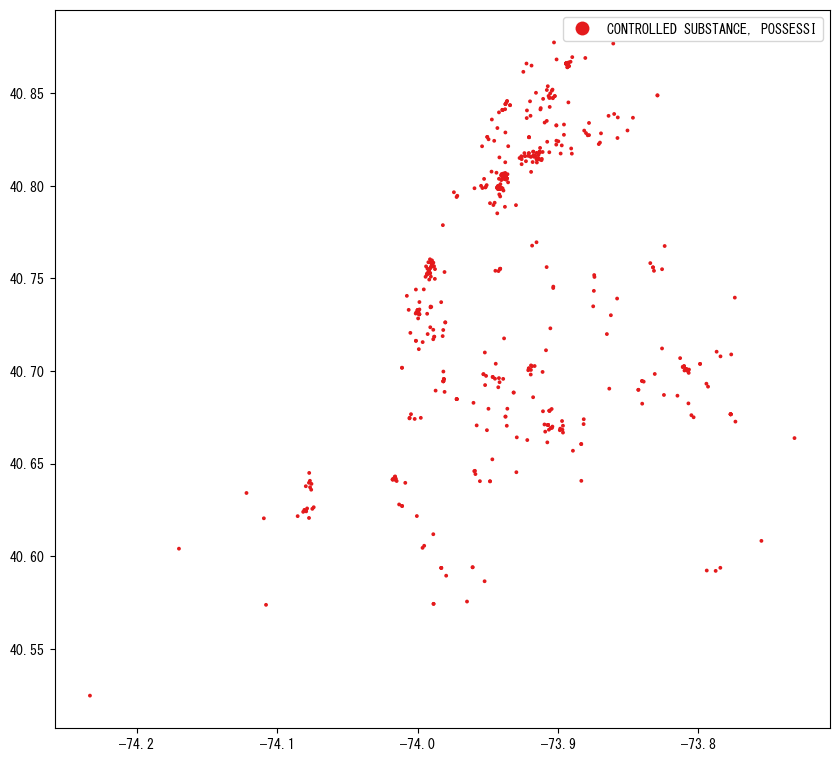

In [72]:
drug.plot(column='pd_desc',legend=True,figsize=(10,10),markersize=3,cmap='Set1')

<Axes: >

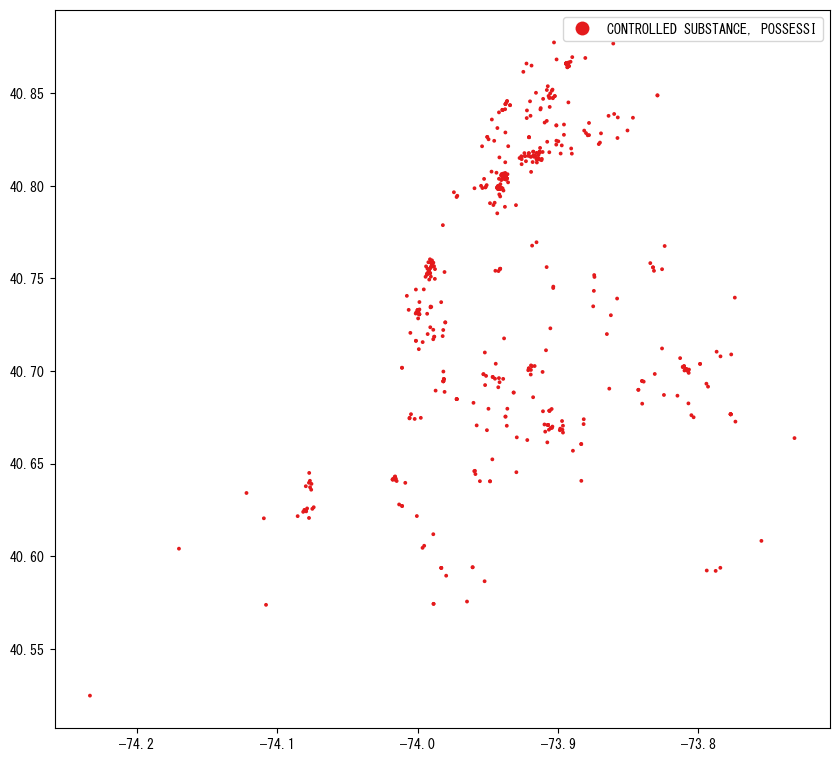

In [73]:
drug.plot(column='pd_desc',legend=True,figsize=(10,10),markersize=3,cmap='Set1')

<Axes: >

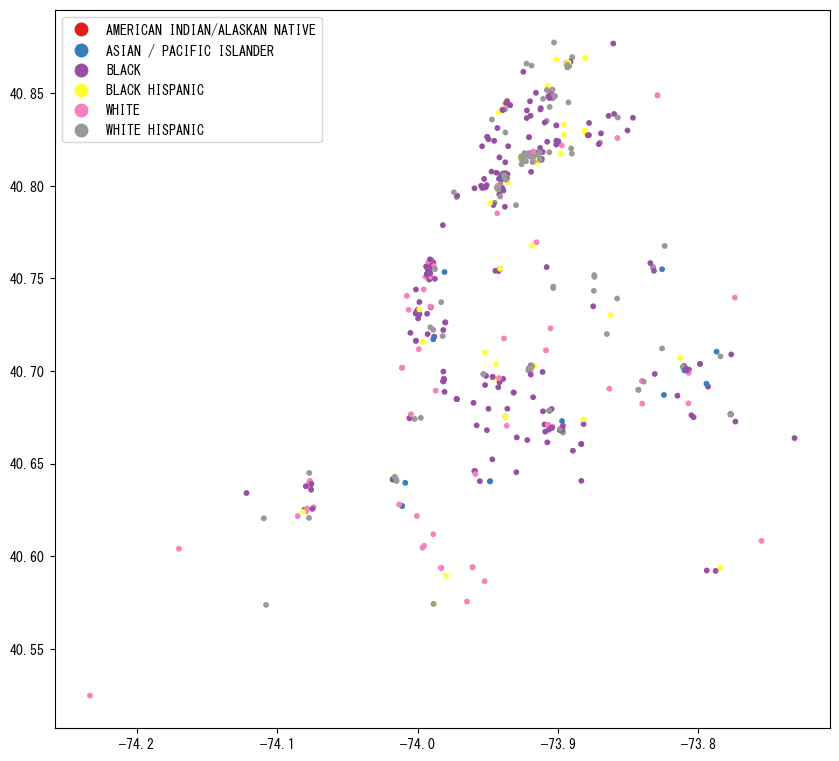

In [74]:
drug.plot(column='perp_race',legend=True,figsize=(10,10),markersize=10,cmap='Set1')

<Axes: >

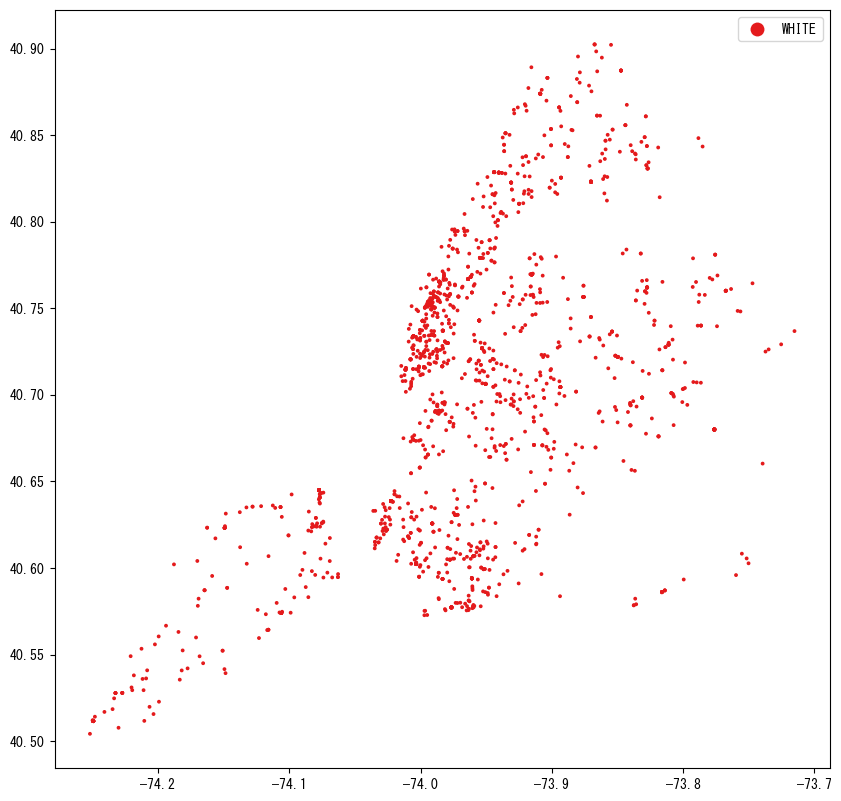

In [75]:
white.plot(column='perp_race',legend=True,figsize=(10,10),markersize=3,cmap='Set1')

ValueError: aspect must be finite and positive 

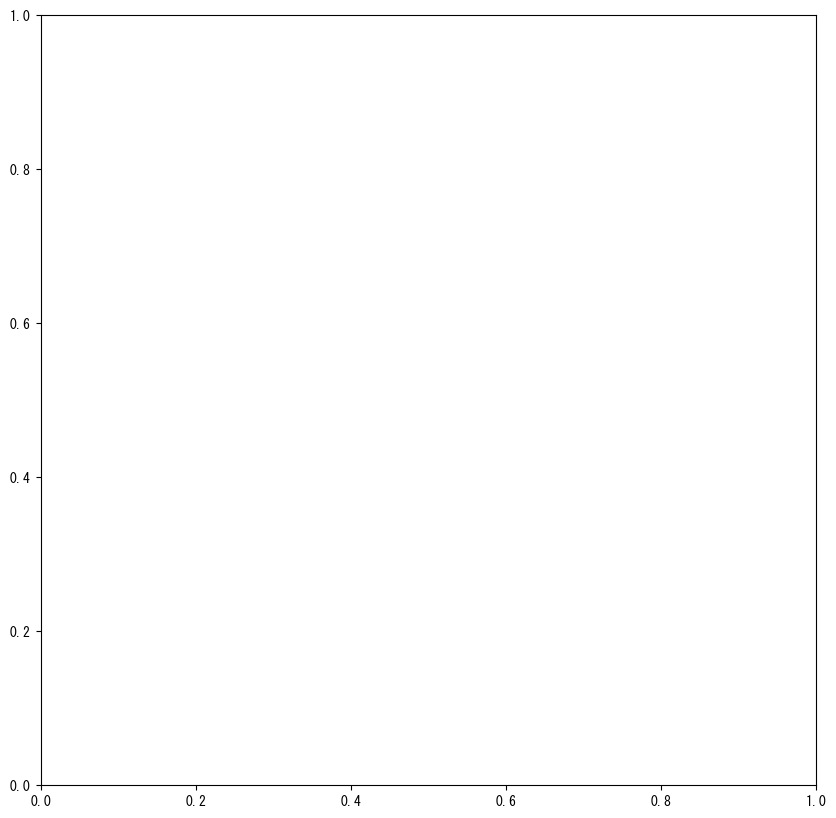

In [79]:
black.plot(column='ofns_desc',figsize=(10,10),markersize=3,cmap='Set1')

<Axes: >

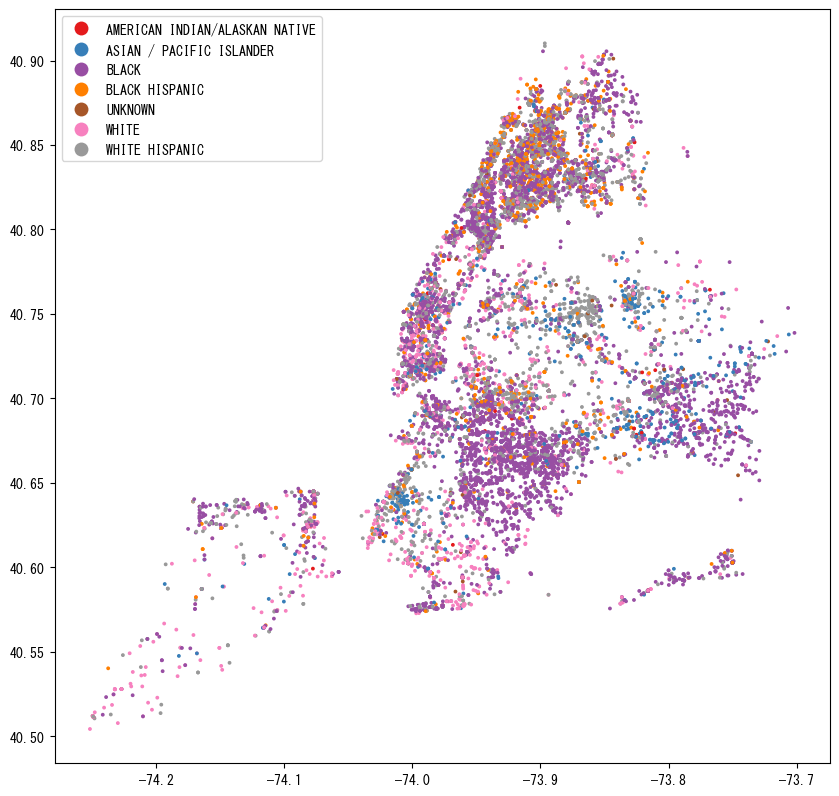

In [80]:
ny.plot(column='perp_race',legend=True,figsize=(10,10),markersize=3,cmap='Set1')

<Axes: >

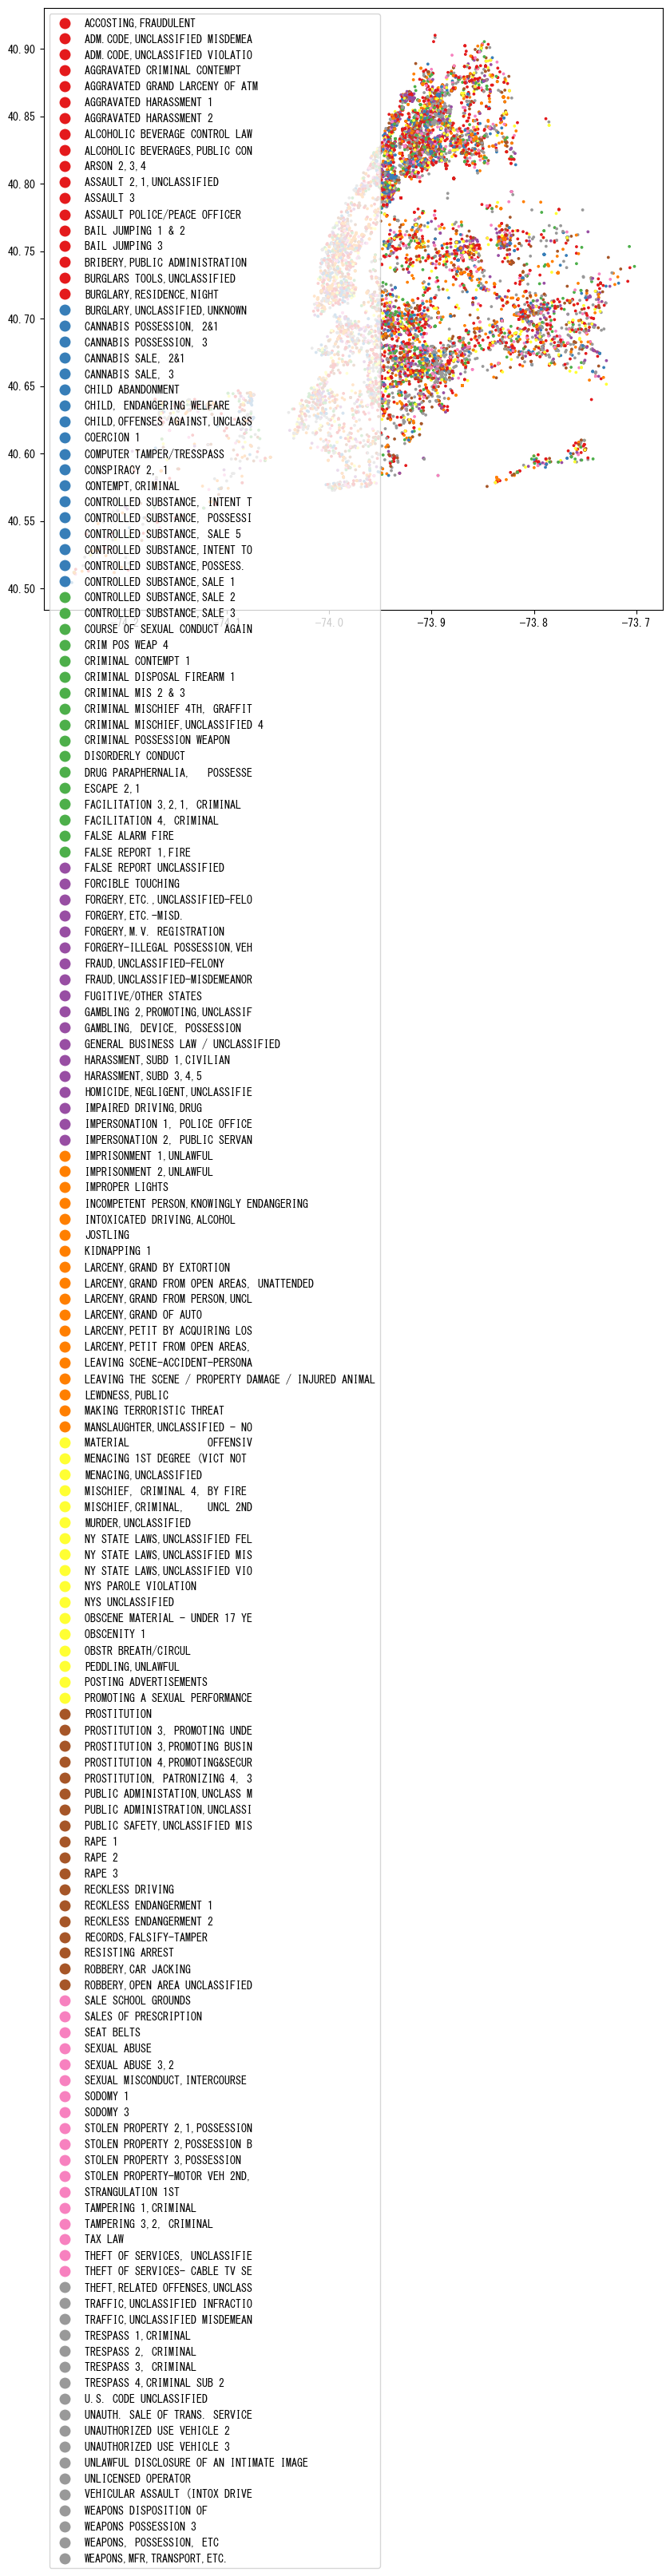

In [83]:
ny.plot(column='pd_desc',legend=True,figsize=(10,10),markersize=3,cmap='Set1')

<Axes: >

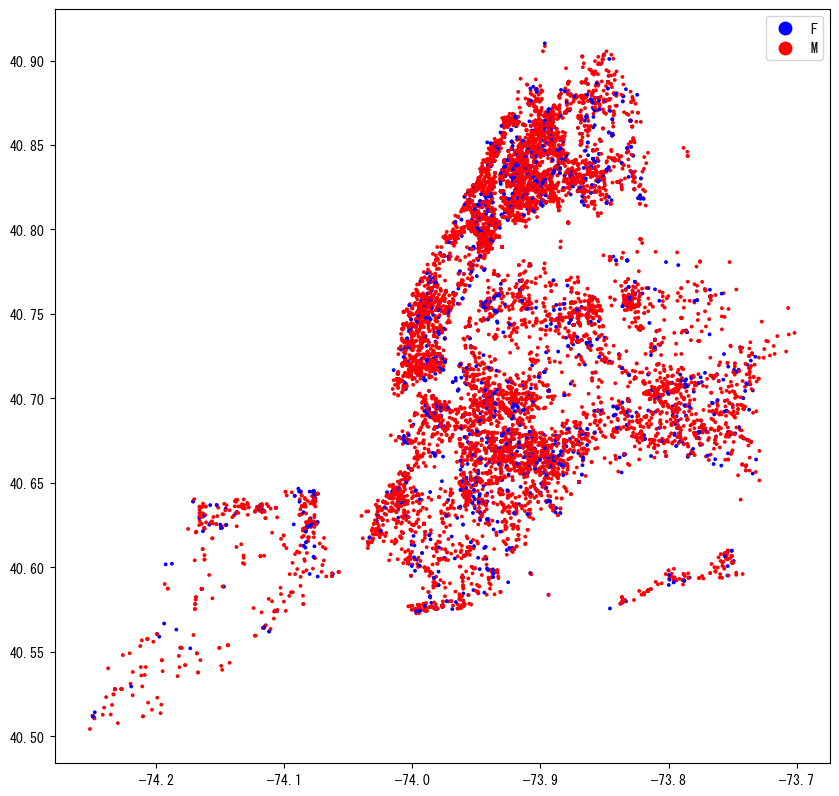

In [81]:
ny.plot(column='perp_sex',legend=True,figsize=(10,10),markersize=3,cmap='bwr')